In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
plt.rcParams['figure.dpi'] = 150

# Reading data
df = pd.read_csv('/content/movie_metadata.csv')
print('Checking number of rows:',df.shape[0])


Checking number of rows: 5043


In [91]:
print('Checking number of columns:',df.shape[1])

Checking number of columns: 28


In [92]:
print('Checking all columns Name:')
df.columns

Checking all columns Name:


Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [93]:
print('Checking first 50 rows:')
df.head(50)



Checking first 50 rows:


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [94]:
print('Checking if any duplicates data are available or not before removing/cleaning duplicates')
print(df.duplicated().any())


Checking if any duplicates data are available or not before removing/cleaning duplicates
True


In [95]:
print('Checking all duplicates rows')
duplicate_rows = df[df.duplicated(keep=False)]
print(duplicate_rows)


Checking all duplicates rows
                 color     director_name  num_critic_for_reviews  duration  \
17               Color       Joss Whedon                   703.0     173.0   
63               Color       David Yates                   248.0     110.0   
98               Color      Hideaki Anno                     1.0     120.0   
100              Color         Rob Cohen                   187.0     106.0   
137              Color       David Yates                   248.0     110.0   
...                ...               ...                     ...       ...   
4927             Color       Jason Stone                    48.0     108.0   
4942             Color     Paul Schrader                   130.0      93.0   
4949             Color     David Hewlett                     8.0      88.0   
4950             Color     David Hewlett                     8.0      88.0   
4951   Black and White  George A. Romero                   284.0      96.0   

      director_facebook_likes  act

In [96]:
print("remove all duplicate rows and then print df without duplicates")
df_without_duplicates = df.drop_duplicates()
print(df_without_duplicates)



remove all duplicate rows and then print df without duplicates
      color      director_name  num_critic_for_reviews  duration  \
0     Color      James Cameron                   723.0     178.0   
1     Color     Gore Verbinski                   302.0     169.0   
2     Color         Sam Mendes                   602.0     148.0   
3     Color  Christopher Nolan                   813.0     164.0   
4       NaN        Doug Walker                     NaN       NaN   
...     ...                ...                     ...       ...   
5038  Color        Scott Smith                     1.0      87.0   
5039  Color                NaN                    43.0      43.0   
5040  Color   Benjamin Roberds                    13.0      76.0   
5041  Color        Daniel Hsia                    14.0     100.0   
5042  Color           Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                         0.0                

In [97]:
print("checking that all duplicates being removed or left any")
c2_duplicates = df_without_duplicates[df_without_duplicates.duplicated(keep=False)]
print(c2_duplicates)


checking that all duplicates being removed or left any
Empty DataFrame
Columns: [color, director_name, num_critic_for_reviews, duration, director_facebook_likes, actor_3_facebook_likes, actor_2_name, actor_1_facebook_likes, gross, genres, actor_1_name, movie_title, num_voted_users, cast_total_facebook_likes, actor_3_name, facenumber_in_poster, plot_keywords, movie_imdb_link, num_user_for_reviews, language, country, content_rating, budget, title_year, actor_2_facebook_likes, imdb_score, aspect_ratio, movie_facebook_likes]
Index: []

[0 rows x 28 columns]


**Explanation for removing duplicate rows:**
Here I have removed 45 duplicated rows here, as we dont need to analayse the same data twice.

In [98]:
print("checking the existing data types in each column")
print(df_without_duplicates.dtypes)


checking the existing data types in each column
color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                 

In [99]:
print("Checking rows containing null values.....")
null_val = df_without_duplicates.isnull()
rows_with_null = df_without_duplicates[null_val.any(axis=1)]

Checking rows containing null values.....


In [100]:
print("Rows containing null values:")
print(rows_with_null)

Rows containing null values:
      color     director_name  num_critic_for_reviews  duration  \
4       NaN       Doug Walker                     NaN       NaN   
55    Color        Peter Sohn                   298.0      93.0   
84    Color      Roland Joffé                    10.0     109.0   
98    Color      Hideaki Anno                     1.0     120.0   
99    Color     Peter Jackson                   645.0     182.0   
...     ...               ...                     ...       ...   
5037  Color      Edward Burns                    14.0      95.0   
5038  Color       Scott Smith                     1.0      87.0   
5039  Color               NaN                    43.0      43.0   
5040  Color  Benjamin Roberds                    13.0      76.0   
5041  Color       Daniel Hsia                    14.0     100.0   

      director_facebook_likes  actor_3_facebook_likes        actor_2_name  \
4                       131.0                     NaN          Rob Walker   
55          

In [101]:
df_final = df_without_duplicates.dropna()

In [102]:
print("DataFrame after removing rows with null values:")
print(df_final)

DataFrame after removing rows with null values:
      color      director_name  num_critic_for_reviews  duration  \
0     Color      James Cameron                   723.0     178.0   
1     Color     Gore Verbinski                   302.0     169.0   
2     Color         Sam Mendes                   602.0     148.0   
3     Color  Christopher Nolan                   813.0     164.0   
5     Color     Andrew Stanton                   462.0     132.0   
...     ...                ...                     ...       ...   
5026  Color    Olivier Assayas                    81.0     110.0   
5027  Color       Jafar Panahi                    64.0      90.0   
5033  Color      Shane Carruth                   143.0      77.0   
5035  Color   Robert Rodriguez                    56.0      81.0   
5042  Color           Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes       actor_2_name  \
0                         0.0                   855.0   Joe

**Removed 1275 rows containning Null:** I have removed 1275 rows containing null values, because these nan values are protecting me to change dtype

In [103]:
print("checking the existing data types in each column")
print(df_final.dtypes)


checking the existing data types in each column
color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                 

In [104]:
print("checking numeric columns:")
numeric_columns = df_final.select_dtypes(include=np.number).columns
print(numeric_columns)

checking numeric columns:
Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes'],
      dtype='object')


In [105]:
# Checking infinite values inside numeric columns
inf_values = np.isinf(df_final[numeric_columns]).any(axis=1)
print(inf_values)


0       False
1       False
2       False
3       False
5       False
        ...  
5026    False
5027    False
5033    False
5035    False
5042    False
Length: 3723, dtype: bool


In [106]:
# remove rows containing infinite values
df_final1 = df_final[~inf_values]
print("Data without infinite values:")
print(df_final1)

Data without infinite values:
      color      director_name  num_critic_for_reviews  duration  \
0     Color      James Cameron                   723.0     178.0   
1     Color     Gore Verbinski                   302.0     169.0   
2     Color         Sam Mendes                   602.0     148.0   
3     Color  Christopher Nolan                   813.0     164.0   
5     Color     Andrew Stanton                   462.0     132.0   
...     ...                ...                     ...       ...   
5026  Color    Olivier Assayas                    81.0     110.0   
5027  Color       Jafar Panahi                    64.0      90.0   
5033  Color      Shane Carruth                   143.0      77.0   
5035  Color   Robert Rodriguez                    56.0      81.0   
5042  Color           Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes       actor_2_name  \
0                         0.0                   855.0   Joel David Moore   
1

In [107]:
print("checking dtypes of df_final1")
data_types_final1 = df_final1.dtypes

print("df_final1 - Data Types of Columns:")
print(data_types_final1)

checking dtypes of df_final1
df_final1 - Data Types of Columns:
color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score 

**#EDA on df_final1**

In [108]:
#EDA on df_final1
#hypothesis
#report analysis how to maximise the profit of sussex budget production for their upcoming film if they invest 1.5 which genre will make a good return.

In [109]:
#adding a new column return_amount of investment of £1.5 million
df_final1['return_amount'] =df_final1['gross'] - df_final1['budget']

In [110]:
#check columns again
print(df_final1.columns)

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'return_amount'],
      dtype='object')


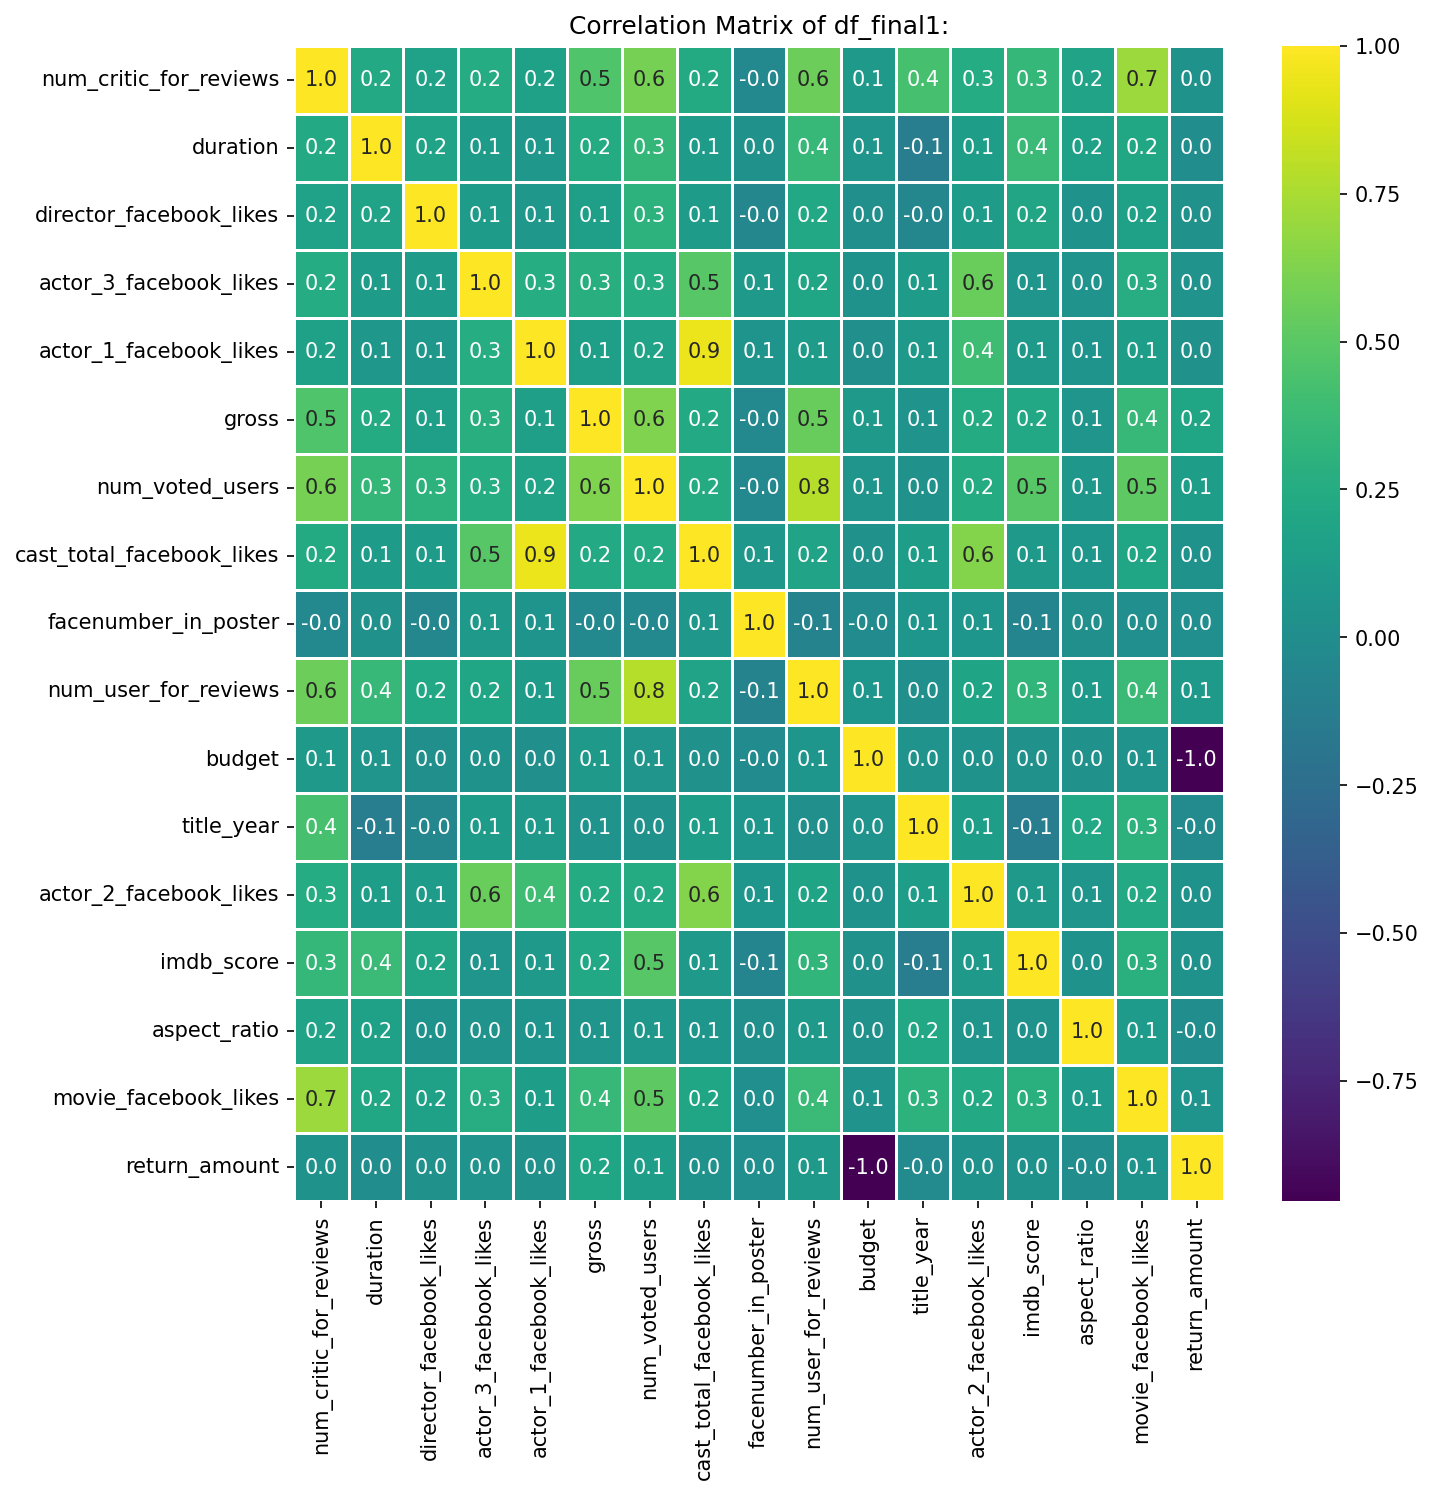

In [111]:
#calculate and map correlation
correlation = df_final1.corr()
plt.figure(figsize=(10, 10))

sns.heatmap(correlation, annot=True, cmap="viridis", fmt=".1f", linewidths=.5)
plt.title("Correlation Matrix of df_final1:")
plt.show()

In [113]:
#checking the highly correlated column
threshold = 0.75
highly_correlated_columns = set()
for i in range(len(correlation.columns)):
    for j in range(i):
        if abs(correlation.iloc[i, j]) > threshold:
            colname = correlation.columns[i]
            highly_correlated_columns.add(colname)


In [114]:
#Removing Highly Correlated column
df_dropped = df_final1.drop(columns=highly_correlated_columns)

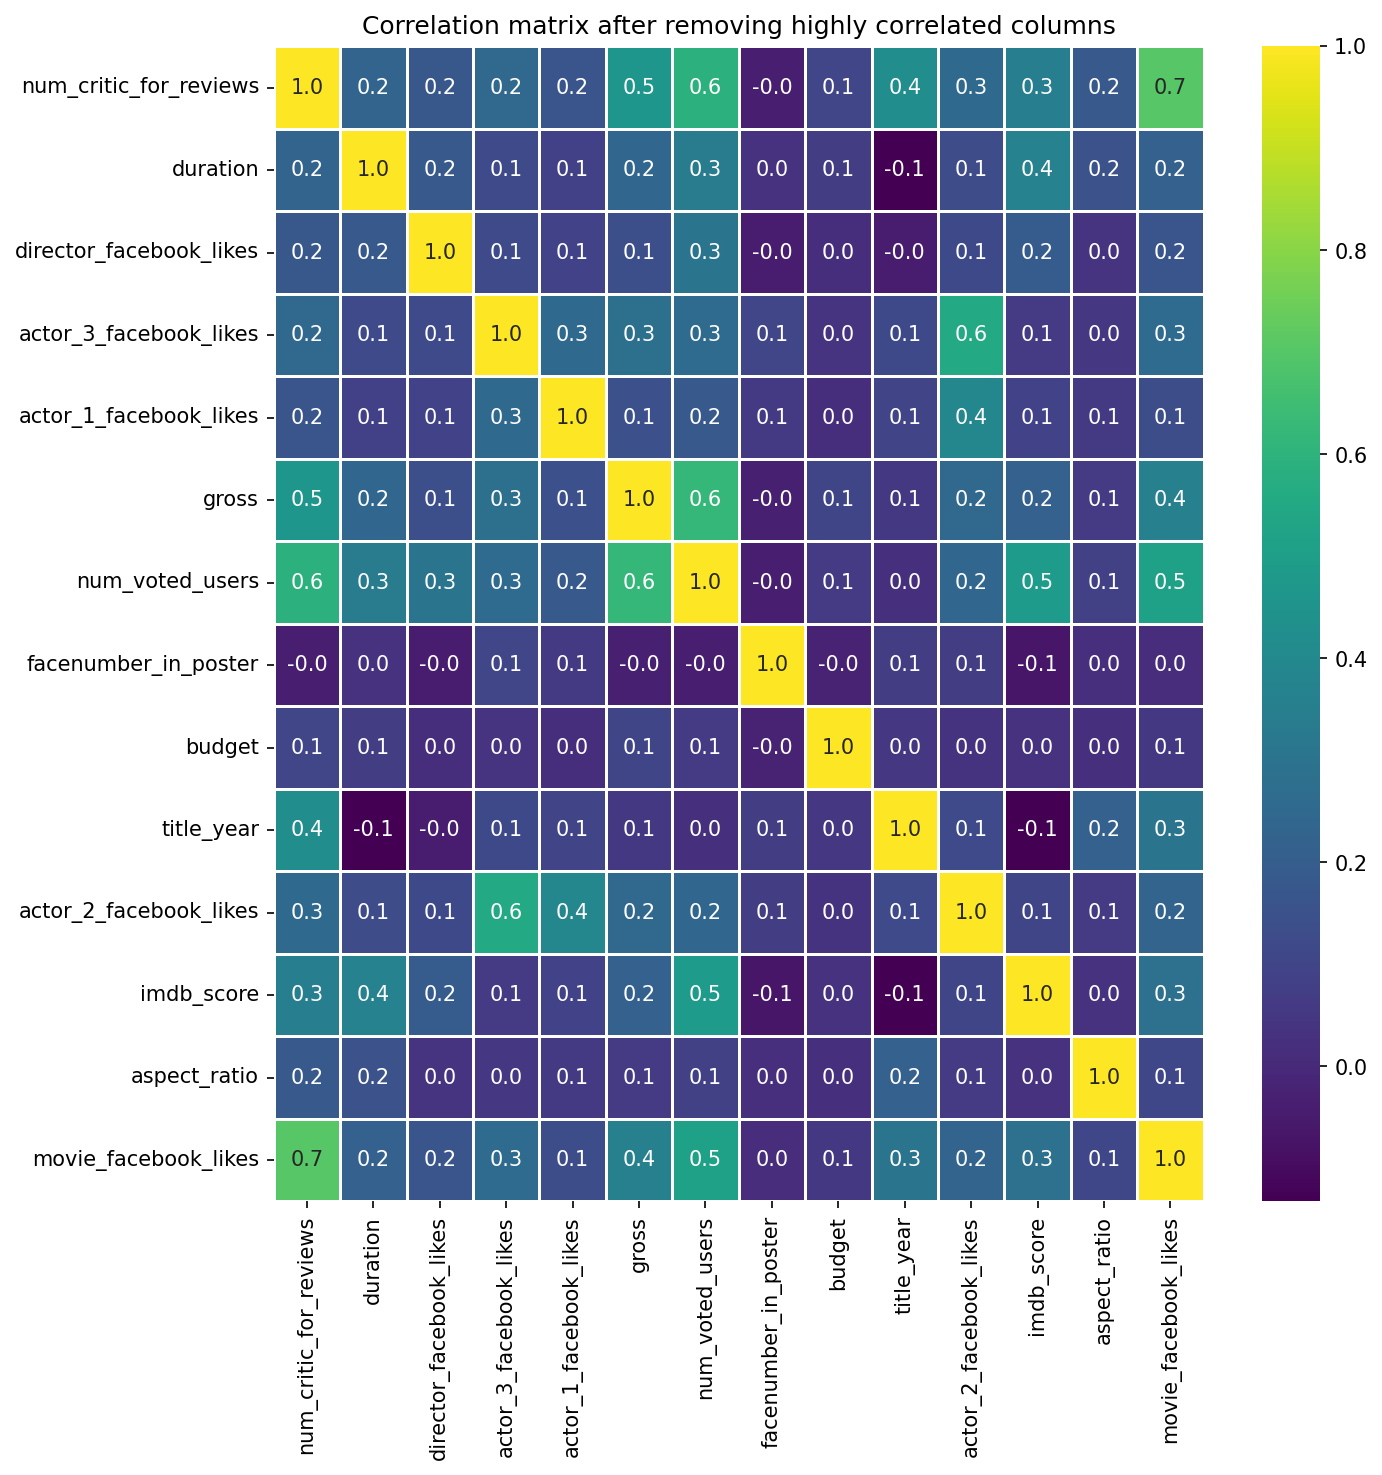

In [115]:
#check the cmap again
correlation_matrix_dropped = df_dropped.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix_dropped, annot=True, cmap="viridis", fmt=".1f", linewidths=.5)
plt.title("Correlation matrix after removing highly correlated columns")
plt.show()

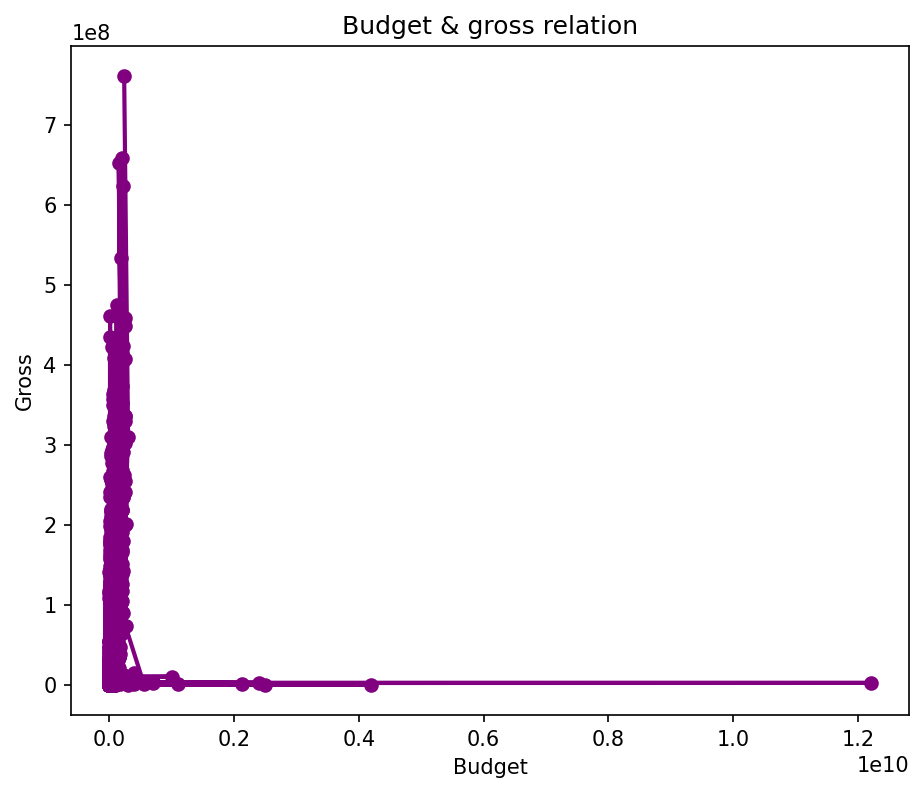

In [116]:
#checking the relation between GROSS & BUDGET
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
plt.plot(df_final1['budget'], df_final1['gross'], color='purple', marker='o', linestyle='-', linewidth=2)
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.title('Budget & gross relation')
plt.tight_layout()
plt.show()

**Budget VS Gross**
the graph above showing is that, the gross doesn't increase based on the budget.typically no relation between them.


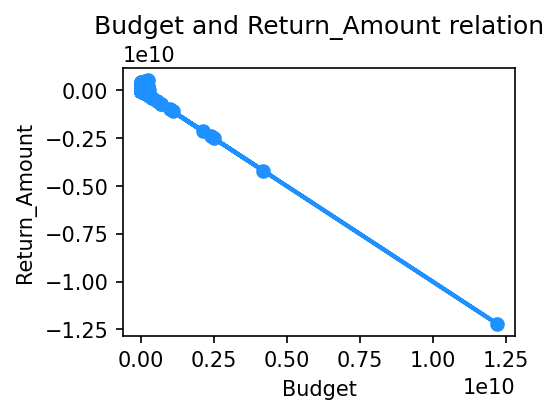

In [117]:
#checking the relation between BUDGET & Return_Amount
plt.subplot(2, 2, 2)
plt.plot(df_final1['budget'], df_final1['return_amount'], color='dodgerblue', marker='o', linestyle='-', linewidth=2)
plt.xlabel('Budget')
plt.ylabel('Return_Amount')
plt.title('Budget and Return_Amount relation')
plt.tight_layout()
plt.show()

**Budget VS RETURN_AMOUNT/OUTCOME/profit**
above graph shows that though the budget is increasing in returns their is no significant impact on return_amount/profit.Profit seems not to increasing at all.

```
# This is formatted as code
```



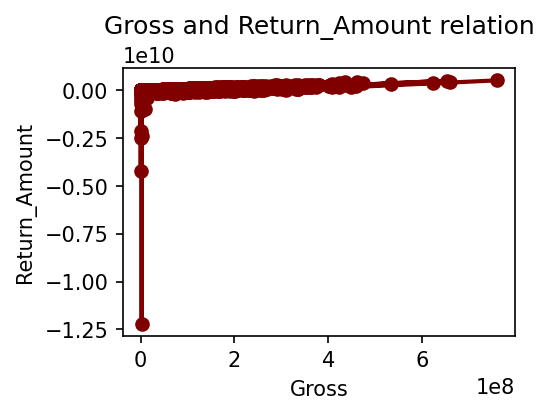

In [118]:

# Line plot for gross and outcome/return_amount
plt.subplot(2, 2, 3)
plt.plot(df_final1['gross'], df_final1['return_amount'], color='maroon', marker='o', linestyle='-', linewidth=2)
plt.xlabel('Gross')
plt.ylabel('Return_Amount')
plt.title('Gross and Return_Amount relation')
plt.tight_layout()
plt.show()

**GROSS VS RETURN_AMOUNT/OUTCOME**
from the graph above  its completely visible that Gross has a positive impact on a good return/profit.*italicized text*

In [128]:
#Checking Number of movies/rws for each genre
no_mov = df_final1['genres'].value_counts()
print("Number of movies for each genre:")
print(no_mov)


Number of movies for each genre:
Comedy|Drama|Romance                     147
Drama                                    140
Comedy|Drama                             137
Comedy                                   137
Comedy|Romance                           131
                                        ... 
Action|Thriller|Western                    1
Action|Family|Fantasy|Musical              1
Action|Adventure|Drama|Family              1
Animation|Comedy|Family|Music|Romance      1
Comedy|Crime|Horror                        1
Name: genres, Length: 745, dtype: int64


In [135]:
#checking genres similar or bellow to $1.5million but made profit earlier as it will be helpful in finding genre that will make us the best profit/outcome/return_amount
sussex_budget_exG = df_final1[df_final1['budget'] <= 1500000]
sussex_budget_exG_highly_return = sussex_budget_exG[sussex_budget_exG['return_amount'] > 0]
sussex_budget_exG_highly_return_genres = sussex_budget_exG_highly_return['genres'].unique()
print("genres similar or bellow to $1.5million but made profit earlier are:")
print(sussex_budget_exG_highly_return_genres)


genres similar or bellow to $1.5million but made profit earlier are:
['Horror|Mystery|Thriller' 'Fantasy|Horror' 'Horror|Thriller' 'Drama'
 'Comedy|Romance' 'Animation|Biography|Documentary|Drama|History|War'
 'Biography|Crime|Documentary|History|Thriller' 'Drama|Romance'
 'Action|Biography|Drama|Sport' 'Comedy|Drama' 'Comedy|Drama|Romance'
 'Comedy|Crime|Drama|Romance' 'Fantasy|Horror|Mystery|Thriller'
 'Comedy|Crime' 'Comedy|Crime|Mystery' 'Drama|Sport'
 'Crime|Drama|Thriller' 'Western' 'Action|Drama|Horror|Thriller'
 'Action|Crime|Thriller' 'Horror' 'Action|Adventure|Thriller'
 'Horror|Mystery|Sci-Fi|Thriller' 'Drama|Horror|Mystery|Thriller'
 'Adventure|Comedy|Drama' 'Comedy|Drama|Music'
 'Biography|Comedy|Drama|Romance' 'Crime|Drama' 'Documentary|Music'
 'Documentary' 'Comedy|Drama|Romance|Sport' 'Crime|Drama|Romance'
 'Biography|Drama|Romance' 'Comedy' 'Drama|Mystery'
 'Action|Adventure|Animation|Comedy|Fantasy|Sci-Fi'
 'Documentary|Drama|Sport' 'Comedy|Musical|Romance'
 'Document

In [130]:
print(sussex_budget_exG_highly_return.to_string(index=False))


           color           director_name  num_critic_for_reviews  duration  director_facebook_likes  actor_3_facebook_likes           actor_2_name  actor_1_facebook_likes       gross                                            genres            actor_1_name                                           movie_title  num_voted_users  cast_total_facebook_likes         actor_3_name  facenumber_in_poster                                                                                       plot_keywords                                      movie_imdb_link  num_user_for_reviews   language     country content_rating    budget  title_year  actor_2_facebook_likes  imdb_score  aspect_ratio  movie_facebook_likes  return_amount
 Black and White        Alfred Hitchcock                   290.0     108.0                  13000.0                   285.0             Vera Miles                   606.0  32000000.0                           Horror|Mystery|Thriller             Janet Leigh                        

In [136]:
sussex_budget_exG_highly_return.head(50)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,return_amount
2242,Black and White,Alfred Hitchcock,290.0,108.0,13000.0,285.0,Vera Miles,606.0,32000000.0,Horror|Mystery|Thriller,...,English,USA,R,806947.0,1960.0,332.0,8.5,1.85,18000,31193053.0
2420,Color,John Carpenter,212.0,89.0,0.0,606.0,Hal Holbrook,2000.0,21378000.0,Fantasy|Horror,...,English,USA,R,1000000.0,1980.0,826.0,6.8,2.35,7000,20378000.0
2492,Color,John Carpenter,318.0,101.0,0.0,598.0,Donald Pleasence,2000.0,47000000.0,Horror|Thriller,...,English,USA,R,300000.0,1978.0,742.0,7.9,2.35,12000,46700000.0
3278,Color,Tobe Hooper,277.0,88.0,365.0,177.0,Edwin Neal,383.0,30859000.0,Horror|Thriller,...,English,USA,R,83532.0,1974.0,371.0,7.5,1.85,0,30775468.0
3821,Color,Billy Bob Thornton,104.0,148.0,0.0,263.0,Dwight Yoakam,3000.0,24475416.0,Drama,...,English,USA,R,890000.0,1996.0,324.0,8.0,1.85,0,23585416.0
4147,Color,Susan Seidelman,35.0,105.0,39.0,183.0,Michael Nouri,267.0,3123749.0,Comedy|Romance,...,English,USA,R,1500000.0,2005.0,225.0,6.5,1.85,88,1623749.0
4268,Color,Catherine Hardwicke,126.0,100.0,308.0,374.0,Sarah Clarke,1000.0,4599680.0,Drama,...,English,USA,R,1500000.0,2003.0,482.0,6.8,1.85,0,3099680.0
4284,Color,Ari Folman,231.0,90.0,56.0,0.0,Ronny Dayag,56.0,2283276.0,Animation|Biography|Documentary|Drama|History|War,...,Hebrew,Israel,R,1500000.0,2008.0,0.0,8.0,1.85,0,783276.0
4353,Color,James Marsh,194.0,90.0,120.0,0.0,Philippe Petit,41.0,2957978.0,Biography|Crime|Documentary|History|Thriller,...,English,UK,PG-13,1000000.0,2008.0,27.0,7.8,1.85,0,1957978.0
4385,Color,Ritesh Batra,195.0,104.0,25.0,73.0,Nimrat Kaur,638.0,4231500.0,Drama|Romance,...,Hindi,India,PG,1000000.0,2013.0,85.0,7.8,2.35,16000,3231500.0


In [137]:
#only keeping neccessary colums
necessary_columns = ['director_name', 'gross', 'genres','budget', 'movie_name', 'return_amount']
df_final1NC = df_final1.filter(items=necessary_columns)
print("DataFrame with selected columns:")
print(df_final1NC)
df_final1NC.head()


DataFrame with selected columns:
          director_name        gross                               genres  \
0         James Cameron  760505847.0      Action|Adventure|Fantasy|Sci-Fi   
1        Gore Verbinski  309404152.0             Action|Adventure|Fantasy   
2            Sam Mendes  200074175.0            Action|Adventure|Thriller   
3     Christopher Nolan  448130642.0                      Action|Thriller   
5        Andrew Stanton   73058679.0              Action|Adventure|Sci-Fi   
...                 ...          ...                                  ...   
5026    Olivier Assayas     136007.0                  Drama|Music|Romance   
5027       Jafar Panahi     673780.0                                Drama   
5033      Shane Carruth     424760.0                Drama|Sci-Fi|Thriller   
5035   Robert Rodriguez    2040920.0  Action|Crime|Drama|Romance|Thriller   
5042           Jon Gunn      85222.0                          Documentary   

           budget  return_amount  
0     2

,director_name,gross,genres,budget,return_amount
0,James Cameron,760505847.0,Action|Adventure|Fantasy|Sci-Fi,237000000.0,523505847.0
1,Gore Verbinski,309404152.0,Action|Adventure|Fantasy,300000000.0,9404152.0
2,Sam Mendes,200074175.0,Action|Adventure|Thriller,245000000.0,-44925825.0
3,Christopher Nolan,448130642.0,Action|Thriller,250000000.0,198130642.0
5,Andrew Stanton,73058679.0,Action|Adventure|Sci-Fi,263700000.0,-190641321.0


In [138]:
#top 10 genres that have earned mximum return.
maxReturn_10genre = df_final1NC.nlargest(10, 'return_amount')
print("Top 10GENRES HAVING maximum RETURN/OUTCOME:")
print(maxReturn_10genre)
maxReturn_10genre.head(10)

Top 10GENRES HAVING maximum RETURN/OUTCOME:
          director_name        gross  \
0         James Cameron  760505847.0   
29      Colin Trevorrow  652177271.0   
26        James Cameron  658672302.0   
3024       George Lucas  460935665.0   
3080   Steven Spielberg  434949459.0   
17          Joss Whedon  623279547.0   
509        Roger Allers  422783777.0   
240        George Lucas  474544677.0   
66    Christopher Nolan  533316061.0   
439           Gary Ross  407999255.0   

                                        genres       budget  return_amount  
0              Action|Adventure|Fantasy|Sci-Fi  237000000.0    523505847.0  
29            Action|Adventure|Sci-Fi|Thriller  150000000.0    502177271.0  
26                               Drama|Romance  200000000.0    458672302.0  
3024           Action|Adventure|Fantasy|Sci-Fi   11000000.0    449935665.0  
3080                             Family|Sci-Fi   10500000.0    424449459.0  
17                     Action|Adventure|Sci-Fi  22000

,director_name,gross,genres,budget,return_amount
0,James Cameron,760505847.0,Action|Adventure|Fantasy|Sci-Fi,237000000.0,523505847.0
29,Colin Trevorrow,652177271.0,Action|Adventure|Sci-Fi|Thriller,150000000.0,502177271.0
26,James Cameron,658672302.0,Drama|Romance,200000000.0,458672302.0
3024,George Lucas,460935665.0,Action|Adventure|Fantasy|Sci-Fi,11000000.0,449935665.0
3080,Steven Spielberg,434949459.0,Family|Sci-Fi,10500000.0,424449459.0
17,Joss Whedon,623279547.0,Action|Adventure|Sci-Fi,220000000.0,403279547.0
509,Roger Allers,422783777.0,Adventure|Animation|Drama|Family|Musical,45000000.0,377783777.0
240,George Lucas,474544677.0,Action|Adventure|Fantasy|Sci-Fi,115000000.0,359544677.0
66,Christopher Nolan,533316061.0,Action|Crime|Drama|Thriller,185000000.0,348316061.0
439,Gary Ross,407999255.0,Adventure|Drama|Sci-Fi|Thriller,78000000.0,329999255.0


top maximum earned movies genres budget was far more than our budget, so i am suggesting if there is any chance to increase the budget that would hve been great.

In [140]:
#checking genres that have made 20million profit by investing 1.5million or bellow
df_final1NC_genres_generated20m = df_final1NC[(df_final1NC['budget'] == 1500000) & (df_final1NC['return_amount'] >= 20000000)]
genres_generated20m = df_final1NC_genres_generated20m['genres'].unique()
print("Genres that made a $20 million profit with a $1.5 million budget:")
print(genres_generated20m)


Genres that made a $20 million profit with a $1.5 million budget:
['Fantasy|Horror|Mystery|Thriller']


**Movie mixed up with four Genres that created 20million revenue on 1.5million investment are Fantasy|Horror|Mystery|Thriller
**

In [144]:
#number of movies with greter or equal revenue to 20millions are from Fantasy|Horror|Mystery|Thriller genres
num_movies_with_selected_genre = len(df_final1NC_genres_generated20m)
print(f"Number of movies with the selected genre: {num_movies_with_selected_genre}")


Number of movies with the selected genre: 1


**Above analysis I find just one movie having this mixed genres name Fantasy|Horror|Mystery|Thriller**

In [145]:
df_final1NC_genres_generated20m.head()

,director_name,gross,genres,budget,return_amount
4413,James Wan,53991137.0,Fantasy|Horror|Mystery|Thriller,1500000.0,52491137.0


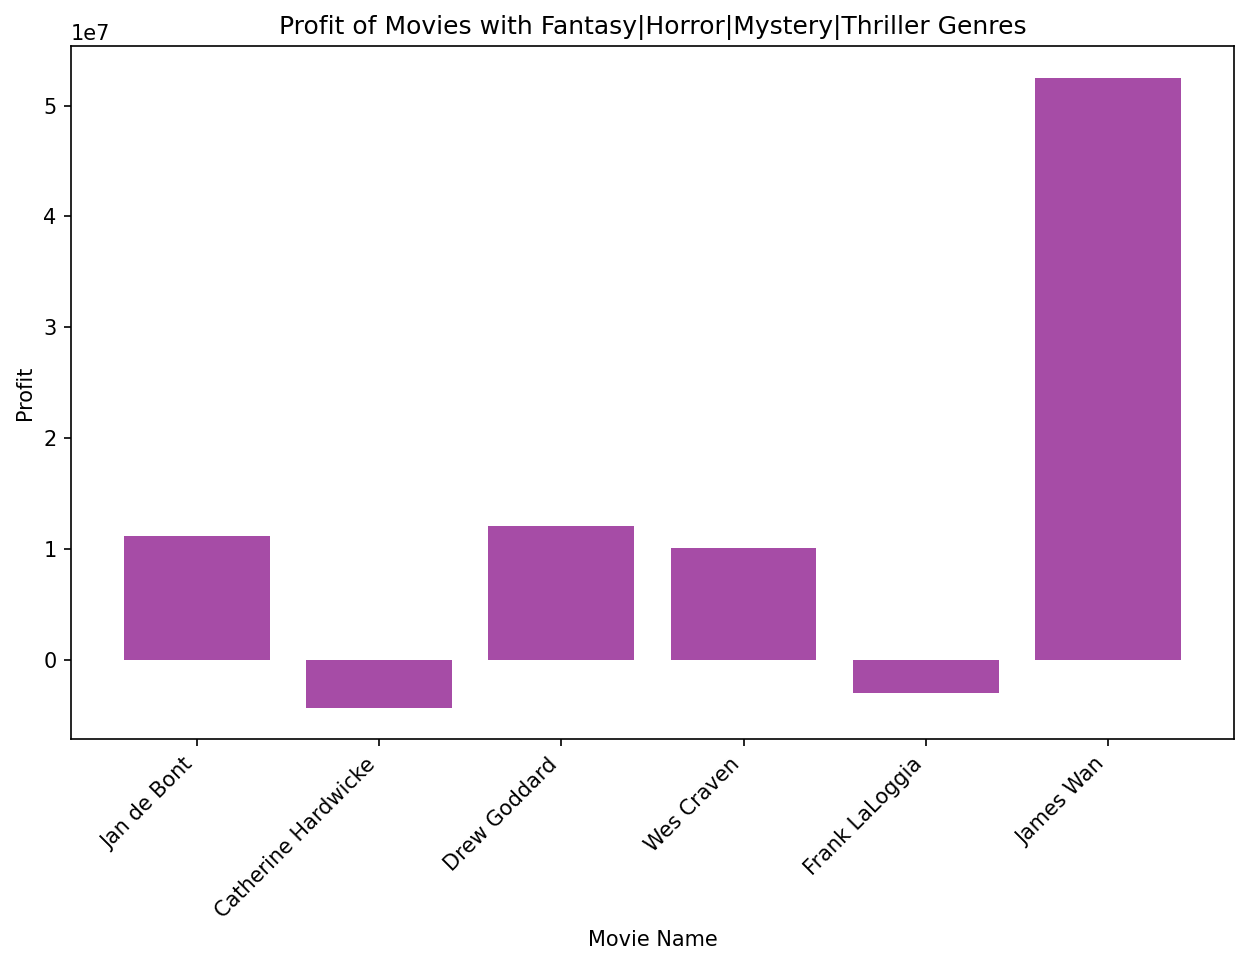

In [146]:
#profit vs  selected genres(that made profit equal or greater than 20million)
FHMT_mov = df_final1NC[df_final1NC['genres'] == 'Fantasy|Horror|Mystery|Thriller']
plt.figure(figsize=(10, 6))
plt.bar(FHMT_mov['director_name'], FHMT_mov['return_amount'], color='purple', alpha=0.7)
plt.xlabel('Movie Name')
plt.ylabel('Profit')
plt.title('Profit of Movies with Fantasy|Horror|Mystery|Thriller Genres')
plt.xticks(rotation=45, ha='right')
plt.show()


**selected genres == (Fantasy|Horror|Mystery|Thriller made 20million or above revenue relation with the profit)**


*   List item
*   List item



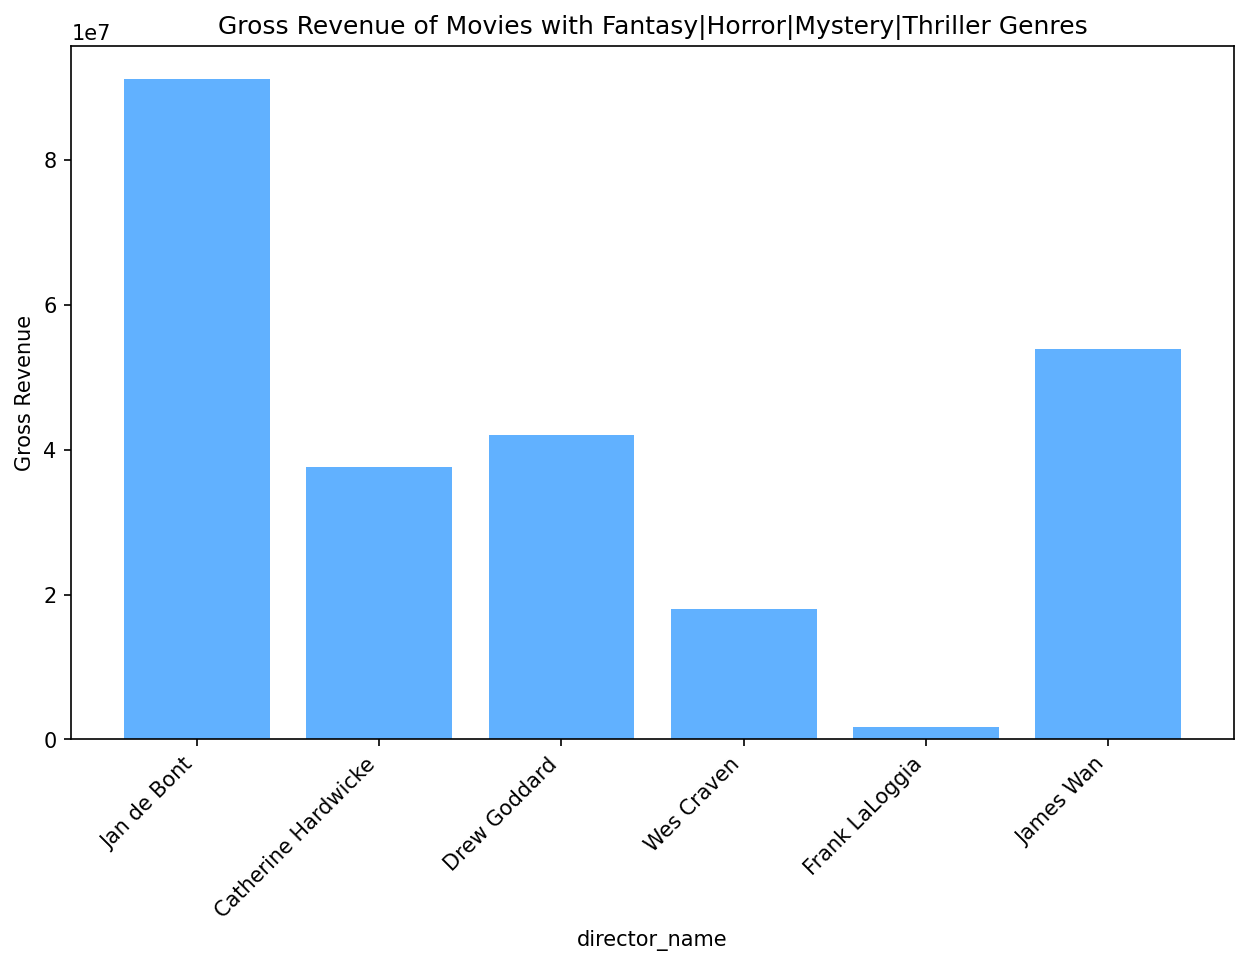

In [152]:
#genre vs budget
plt.figure(figsize=(10, 6))
plt.bar(FHMT_mov['director_name'], FHMT_mov['gross'], color='dodgerblue', alpha=0.7)
plt.xlabel('director_name')
plt.ylabel('gross Revenue')
plt.title('Gross Revenue of Movies with Fantasy|Horror|Mystery|Thriller Genres')
plt.xticks(rotation=45, ha='right')
plt.show()


Mixed genres(Fantasy|Horror|Mystery|Thriller) vs Gross revenue chart

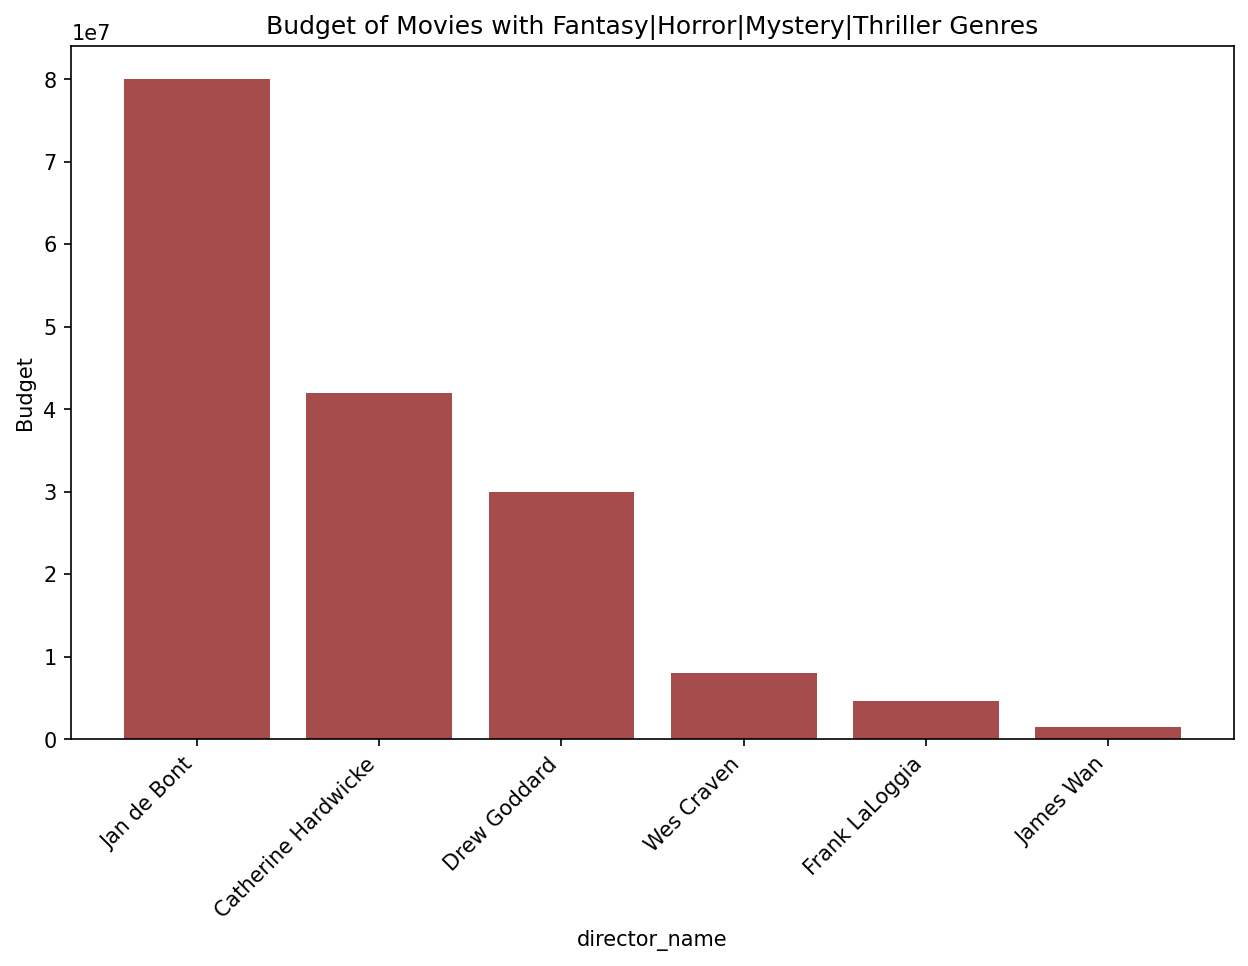

In [155]:
#selected genre vs budget
plt.figure(figsize=(10, 6))
plt.bar(FHMT_mov['director_name'], FHMT_mov['budget'], color='maroon', alpha=0.7)
plt.xlabel('director_name')
plt.ylabel('Budget')
plt.title('Budget of Movies with Fantasy|Horror|Mystery|Thriller Genres')
plt.xticks(rotation=45, ha='right')
plt.show()


Conclusion: From the above EDA analysis, I am suggesting to make a film with mixed/hybrid genres, here, I am recommending in making a film in the Horror genre of(Fantasy|Horror|Mystery|Thriller Genres) genres.Because This genres altogether shown the highest profits within your given budget(1.5million)
now I will do the Hypothesis testing to be sure whether the higher returning money showed by these Fantasy|Horror|Mystery|Thriller Genres statistically profoundness.

**Hypothesis Testing**

In [159]:
df_final1WC_test1 = df_final1NC[df_final1NC['genres']!= 'Fantasy|Horror|Mystery|Thriller']
df_final1WC_test2 = df_final1NC[df_final1NC['genres'] =='Fantasy|Horror|Mystery|Thriller']
print('Mean profit for all genres without Fantasy|Horror|Mystery|Thriller = {}'.format(np.mean(df_final1WC_test1['return_amount'])))
print('Mean profit for mixed Fantasy|Horror|Mystery|Thriller Genres = {}'.format(np.mean(df_final1WC_test2['return_amount'])))

Mean profit for all genres without Fantasy|Horror|Mystery|Thriller = 6238824.352165725
Mean profit for mixed Fantasy|Horror|Mystery|Thriller Genres = 13078593.333333334


here the mean profit values is  higher for the mixed genres of  Fantasy|Horror|Mystery|Thriller Genres

([0], [Text(0, 0, 'Fantasy|Horror|Mystery|Thriller')])

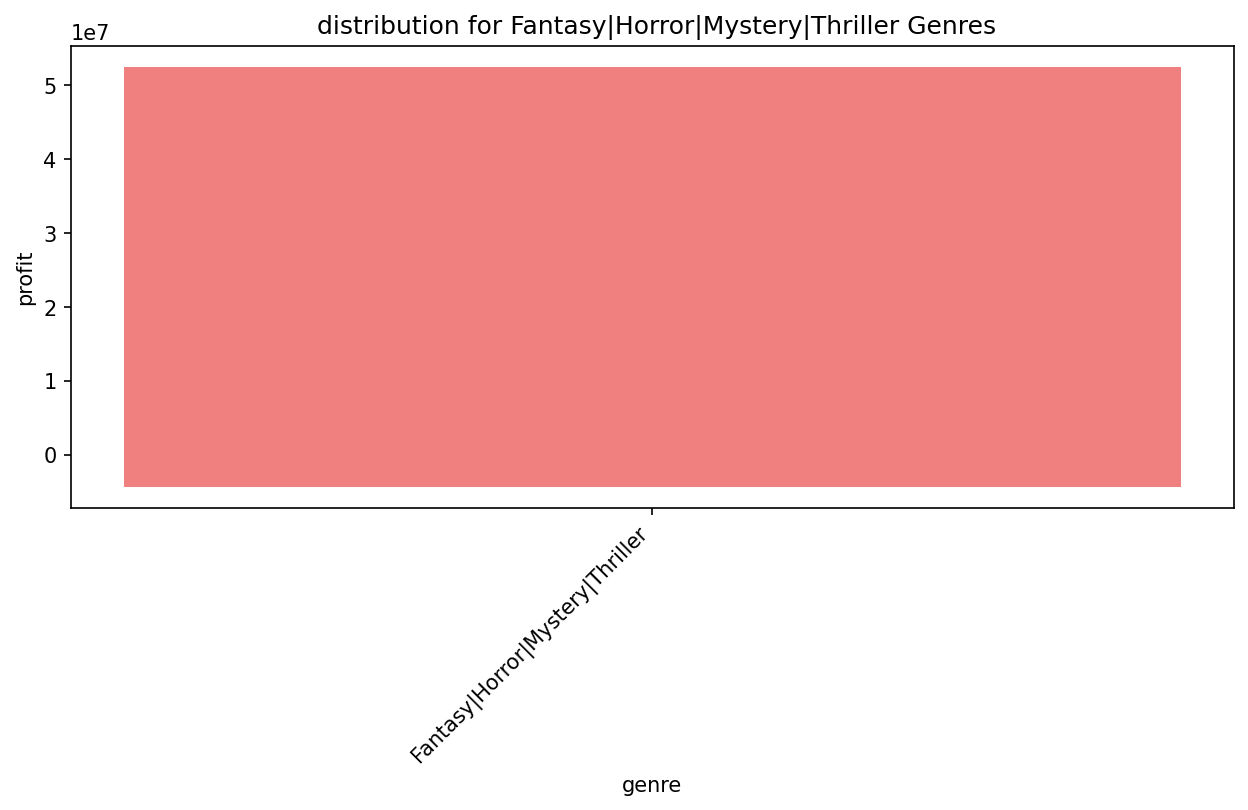

In [161]:
#profit distribution for Fantasy|Horror|Mystery|Thriller Genres
plt.figure(figsize=(10, 4))
plt.bar(df_final1WC_test2['genres'], df_final1WC_test2['return_amount'], color='lightcoral')
plt.title(' distribution for Fantasy|Horror|Mystery|Thriller Genres')
plt.xlabel('genre')
plt.ylabel('profit')
plt.xticks(rotation=45, ha='right')

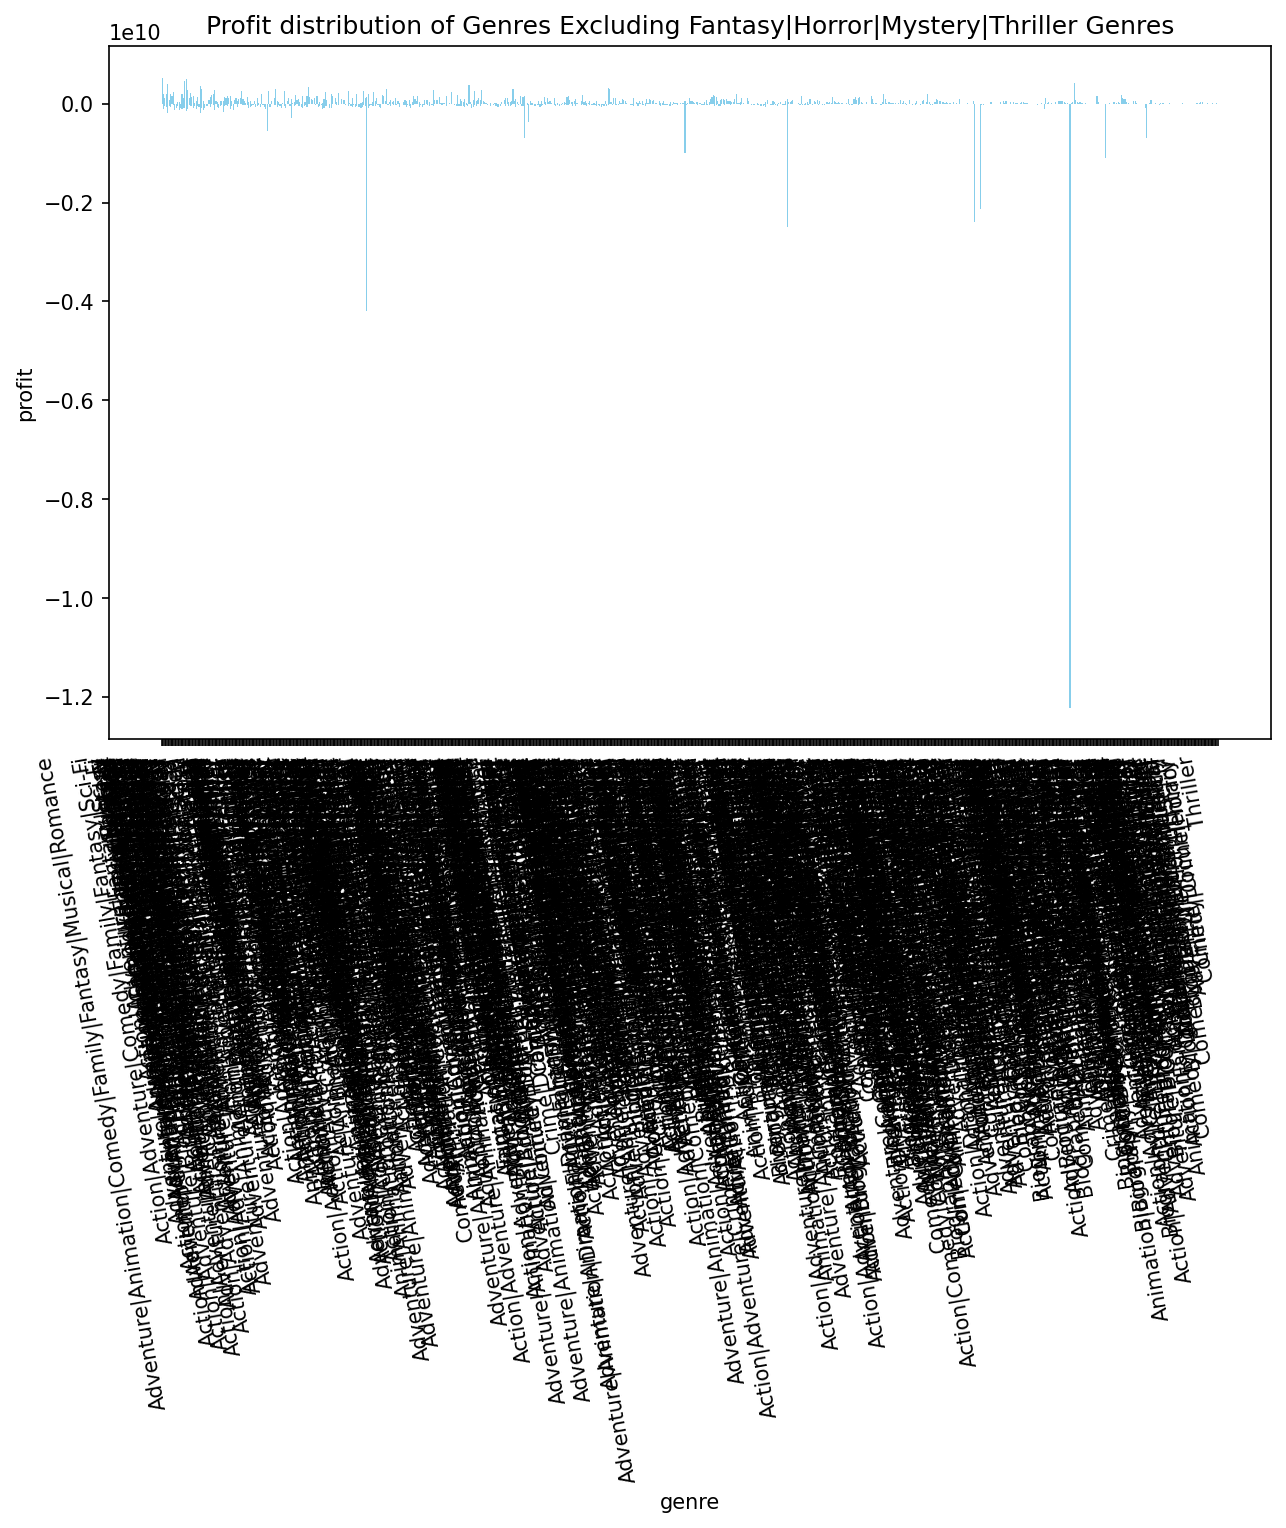

In [175]:
#profit distribution of genres without Fantasy|Horror|Mystery|Thriller Genres
plt.figure(figsize=(10, 6))
plt.bar(df_final1WC_test1['genres'], df_final1WC_test1['return_amount'], color='skyblue')
plt.title('Profit distribution of Genres Excluding Fantasy|Horror|Mystery|Thriller Genres')
plt.xlabel('genre')
plt.ylabel('profit')
plt.xticks(rotation=100, ha='right')
plt.show()


In [198]:
#
def hypothesis_testing(df_final1WC_test1,df_final1WC_test2):
  alpha = [0.01, 0.05, 0.25]
  from scipy.stats import ttest_ind
  stat,p_value = ttest_ind(df_final1WC_test1,df_final1WC_test2, equal_var= False)
  print(p_value/2)
  for i in alpha:
    if p_value/2 < i:
      print('Reject null hypothesis H0 at {} % significance level'.format(i*100))
      break
    else:
      print('Failed to reject null hypothesis H0 at {} % significance level'.format(i*100))

In [199]:
hypothesis_testing(df_final1WC_test2['return_amount'],df_final1WC_test1['return_amount'])


0.24118032482499557
Failed to reject null hypothesis H0 at 1.0 % significance level
Failed to reject null hypothesis H0 at 5.0 % significance level
Reject null hypothesis H0 at 25.0 % significance level


Now, from the above hypothesis testing it is visible that making a movie with mixed.hybrid genres with Fantasy|Horror|Mystery|Thriller Genres can make higher profit than the average of other movies genres with the confidence interval of 75%

**Summery of Report **
 I have conducted and EDA on the given IMDB movie dataset in maximising the profit within the given budget(1.5million).Analysing I came to a conclusion about which movie genres 'sussex budget production' movie need to make for higher revenue.
 At the very beginning I have done
 Reading and Cleaning the data,remove duplicates, NAN, INFINITE VAUES containing all ROWS. checked data and correct data type.
Added an extra columns name return_amount.I also deleted some irrelevant attribitue/columns.Then i analysed most reveneue generated genres and got to realize that all popular genres that made higher revenue was out of our reach due to the budget shortage.Then I analaysed all data that generated the highest revenue equal or over than 20million within our given budget filtered out them correctly. I finalized a hybrid genres(containing four genres together Fantasy|Horror|Mystery|Thriller) has made such revenue that we expected.From all movie genres one mixed genres(Fantasy|Horror|Mystery|Thriller) movie i proposed because of its significantly high returns over the budget(mostly the revenue is closely 20times than the budget)
Finally I did hypothesis testing as the sample size was quite lower i avoid using z-test and applied t-test then I came to extract that I could propose a mixed genres(Fantasy|Horror|Mystery|Thriller) movie at a 75% confidence interval.